Task 6: Model Tuning 

● Use parameters like: 
○ max_depth 
○ min_samples_split 
● Show how performance changes. 
● Plot training vs testing accuracy to visualize overfitting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sb


In [15]:
df = pd.read_csv('Titanic.csv')
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
df_clean = df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'])


In [25]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [24]:
encoder = LabelEncoder()

df['Sex'] = encoder.fit_transform(df['Sex'])
df['Embarked'] = encoder.fit_transform(df['Embarked'])


In [23]:
features = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
target = df['Survived']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
train_accuracies = []
test_accuracies = []
depth_range = range(1, 21)

for depth in depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=2, random_state=42)
    clf.fit(X_train, y_train)
    
    train_score = accuracy_score(y_train, clf.predict(X_train))
    test_score = accuracy_score(y_test, clf.predict(X_test))
    
    train_accuracies.append(train_score)
    test_accuracies.append(test_score)


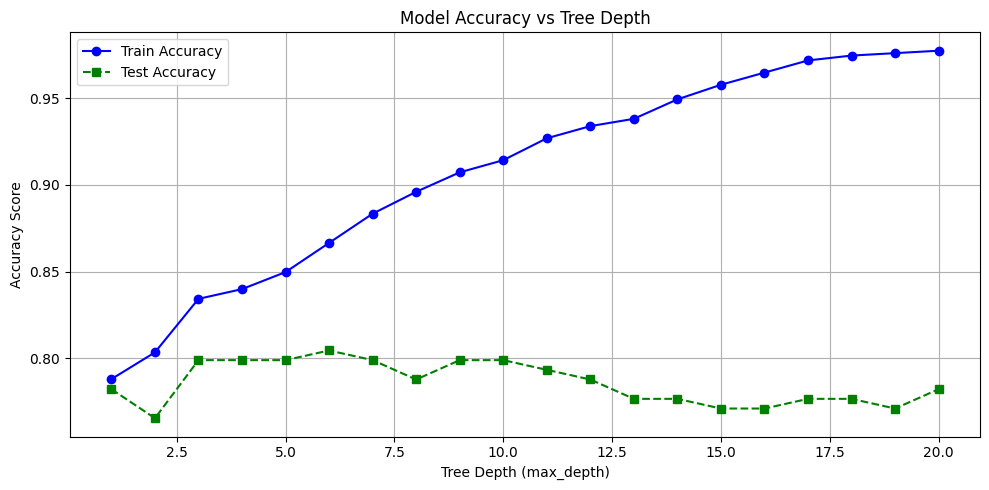

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(depth_range, train_accuracies, marker='o', linestyle='-', color='blue', label='Train Accuracy')
plt.plot(depth_range, test_accuracies, marker='s', linestyle='--', color='green', label='Test Accuracy')
plt.title('Model Accuracy vs Tree Depth')
plt.xlabel('Tree Depth (max_depth)')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


✅ Observations: Model Tuning with max_depth
Overfitting:
When the training accuracy remains very high but the testing accuracy drops significantly, it indicates that the model is overfitting the training data and failing to generalize well on unseen data.

Underfitting:
If both training and testing accuracies are low across depths, it suggests that the model is too simple to capture underlying patterns — a sign of underfitting.

Ideal Tree Depth:
The optimal value for max_depth is where both training and testing accuracies are relatively high and close to each other, indicating a good balance between bias and variance.